# Summary
The activity described in this document is intended to be used as an introduction to using Python, python modules, and Jupyter Notebook to import, display, and analyze large data sets. The data set(s) included for analysis are larger than those typically hand-graphed, but considerably smaller than even small particle physics data sets such as that which WG5𝛂 is including in their analysis.

## 1. Jupyter Notebooks

The document you are looking at now is a Jupyter Notebook. This is a tool used by real professional scientists at CERN (and elsewhere) to analyse the data coming from the LHC. Jupyter notebooks consist of text like this and code cells, like the one below. In the code cells, you can type code in the python programming language. Select the cell and then press ctrl+enter to run the code. Start by running the code cell below. (This code is needed to load some software packages that you will need to use later)

Select the cell and then press ctrl+enter to run the code. Start by running the code cell below. (This code is needed to load some software packages that you will need to use later)

In [1]:
import pandas as pd 
#pandas is for data structures and data analysis tools
import numpy as np
#numpy is for scientific computing
import matplotlib.pyplot as plt
#matplotlib is for plotting

## 2. Revealing the data
Start by running the code cell below.

As you have noticed, nothing seems to have happened. The data is read and stored in your array, but the information is still "invisible" to you. 

In [2]:
# importing the data into a "data frame"
# elevator data from floor 0 to 4 to -1 back to 0
data = pd.read_csv('data/phyphox_39_0_to__0_with_stop.csv')

An array is really just a table, so we need to know how it looks like and whot is the number of rows (this corresponds to the number of experimental measurements and is the length of the array).

In [3]:
data.head()

,Time (s),Pressure (hPa)
0,0.000000,965.658035
1,1.014319,965.657806
2,2.028876,965.657578
3,3.042181,965.648727
4,4.055853,965.635986


In [4]:
len(data)

84

## 3. Understanding data

The array contains 84 experimental measurements:
Time (s)	Pressure (hPa)

To get an impression we can just plot them in a Pressure-Time-Diagramm:

<function matplotlib.pyplot.show(*args, **kw)>

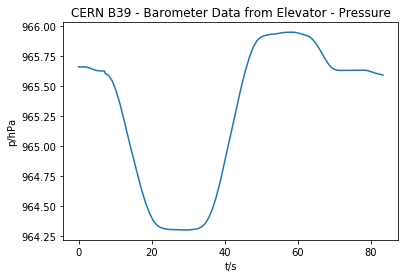

In [5]:
# t is for time from data in s
t=data["Time (s)"]
# p is for pressure from data in hPa
p=data["Pressure (hPa)"]
# plotting the pressure data
plt.title('CERN B39 - Barometer Data from Elevator - Pressure')
plt.xlabel('t/s')
plt.ylabel('p/hPa')
plt.plot(t,p)
plt.show

## 4. Presenting the data

The data are collected with a smartphone on an elevator. With some physics we can derive the height of the building. And we can reconstruct the path of the smartphone between the different floors of the bulilding:

CERN Hight of Building 39: 11.275586136595257 Hight of one Floor: 2.818896534148814


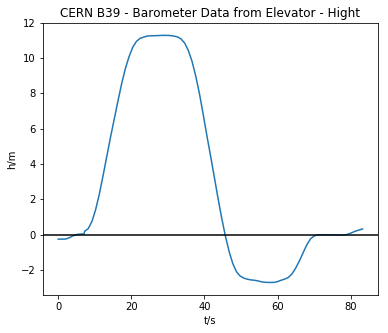

In [6]:
# now we have to calculate the hight of the building h04
# p4 is the pressure at floor 4, datapoint 30
# p0 is the pressure at floor 0, datapoint 5
p4=data.loc[30,"Pressure (hPa)"]
p0=data.loc[5,"Pressure (hPa)"]
h4=(p0-p4)/1.2/9.81*100
# with h04 we can calculate the h values
h=h4-(p-p4)/1.2/9.81*100
print("CERN Hight of Building 39:",h4,"Hight of one Floor:", h4/4)
#plot hight
fig, dat = plt.subplots(figsize=(6,5))
plt.title('CERN B39 - Barometer Data from Elevator - Hight')
plt.xlabel('t/s')
plt.ylabel('h/m')
plt.plot(t,h)
# draw a line at ground level
plt.axhline(y=0, color='black')